In [1]:
import os
import numpy as np
from PIL import Image

# Define the paths to your image folders
fake_folder =r"C:\Users\Aiyush\OneDrive\Desktop\real_and_fake_face_detection\real_and_fake_face\training_fake"
real_folder = r"C:\Users\Aiyush\OneDrive\Desktop\real_and_fake_face_detection\real_and_fake_face\training_real"

# Function to load and preprocess images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            img = img.resize((224, 224))  # Resize the image to a common size
            img = np.array(img) / 255.0   # Normalize pixel values to [0, 1]
            images.append(img)
    return np.array(images)

# Load and preprocess fake images
fake_images = load_images_from_folder(fake_folder)
fake_labels = np.zeros(len(fake_images))  # Label fake images as 0

# Load and preprocess real images
real_images = load_images_from_folder(real_folder)
real_labels = np.ones(len(real_images))   # Label real images as 1

# Combine fake and real images into a single dataset
X = np.concatenate((fake_images, real_images), axis=0)
y = np.concatenate((fake_labels, real_labels), axis=0)

print("Dataset shape:", X.shape)
print("Labels shape:", y.shape)

Dataset shape: (2041, 224, 224, 3)
Labels shape: (2041,)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)    

In [32]:
history = model.fit(X, y, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
51/51 [==============================] - 31s 607ms/step - loss: 0.5648 - accuracy: 0.7059 - val_loss: 0.9287 - val_accuracy: 0.3594
Epoch 2/15
51/51 [==============================] - 33s 644ms/step - loss: 0.5067 - accuracy: 0.7561 - val_loss: 0.9962 - val_accuracy: 0.4548
Epoch 3/15
51/51 [==============================] - 32s 633ms/step - loss: 0.3990 - accuracy: 0.8070 - val_loss: 1.5495 - val_accuracy: 0.3472
Epoch 4/15
51/51 [==============================] - 34s 676ms/step - loss: 0.2919 - accuracy: 0.8732 - val_loss: 1.1846 - val_accuracy: 0.5134
Epoch 5/15
51/51 [==============================] - 34s 675ms/step - loss: 0.1626 - accuracy: 0.9344 - val_loss: 2.3307 - val_accuracy: 0.3692
Epoch 6/15
51/51 [==============================] - 34s 668ms/step - loss: 0.0974 - accuracy: 0.9651 - val_loss: 1.4592 - val_accuracy: 0.5672
Epoch 7/15
51/51 [==============================] - 34s 662ms/step - loss: 0.0715 - accuracy: 0.9737 - val_loss: 4.3685 - val_accuracy: 0.3863

In [33]:
test_loss, test_acc = model.evaluate(X, y)
print('Test accuracy:', test_acc)

64/64 [==============================] - 15s 222ms/step - loss: 1.1076 - accuracy: 0.8878
Test accuracy: 0.8878000974655151


In [47]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image to match model input size
    img = np.array(img) / 255.0   # Normalize pixel values to [0, 1]
    return img

# Define a function to predict whether an image is real or fake
def predict_image_real_or_fake(image_path, model):
    img = load_and_preprocess_image(image_path)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    if prediction[0][0] >= 0.5:
        return "Real"
    else:
        return "Fake"

# Test the model on a sample image
test_image_path = r"C:\Users\Aiyush\OneDrive\Desktop\Q_1665285526649.jpg" # Replace with the path to your test image
prediction = predict_image_real_or_fake(test_image_path, model)
print("Prediction for", test_image_path, ":", prediction)


1/1 [==============================] - 0s 35ms/step
Prediction for C:\Users\Aiyush\OneDrive\Desktop\Q_1665285526649.jpg : Real


In [41]:
model.save('fake_image_detection_model.keras')

In [38]:
for layer in reversed(model.layers):
    if 'conv' in layer.name:
        last_conv_layer_name = layer.name
        break

print("Name of last convolutional layer:", last_conv_layer_name)

Name of last convolutional layer: conv2d_3


1/1 [==============================] - 0s 56ms/step
Prediction for C:\Users\Aiyush\OneDrive\Desktop\easy_15_0011.jpg :
 FAKE 


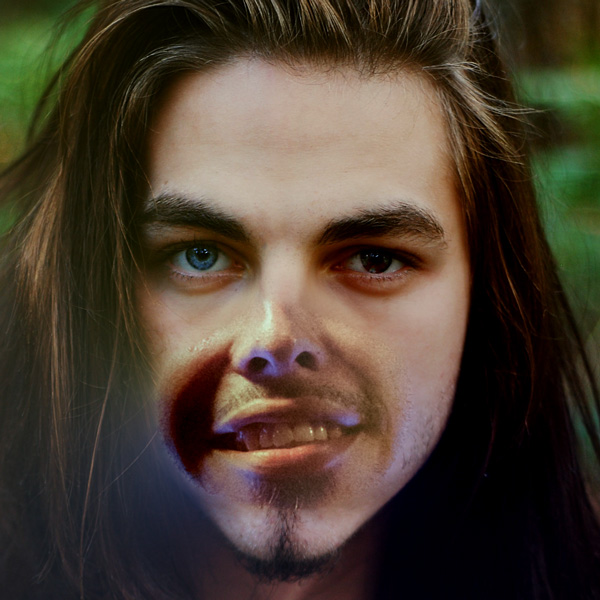

In [64]:
from PIL import Image
import numpy as np
from IPython.display import display

# Assuming the rest of your code is already defined...

test_image_path =r"C:\Users\Aiyush\OneDrive\Desktop\easy_15_0011.jpg" # Replace with the path to your test image
prediction = predict_image_real_or_fake(test_image_path, model)
print("Prediction for", test_image_path, ":\n\033[1m", prediction.upper(), "\033[0m")
# Show the image
img = Image.open(test_image_path)
display(img)